<a href="https://colab.research.google.com/github/m677s345/EECS731_MS_Project1/blob/master/EECS731_project1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install cookiecutter and build code framework

In [1]:
!pip install cookiecutter
!cookiecutter https://github.com/drivendata/cookiecutter-data-science


     |████████████████████████████████| 51kB 2.5MB/s 
project_name [project_name]: EECS731_project1_pandas
repo_name [eecs731_project1_pandas]: EECS731_project1_pandas
author_name [Your name (or your organization/company/team)]: Matt Stalcup
description [A short description of the project.]: 
Select open_source_license:
1 - MIT
2 - BSD-3-Clause
3 - No license file
Choose from 1, 2, 3 [1]: 
s3_bucket [[OPTIONAL] your-bucket-for-syncing-data (do not include 's3://')]: 
aws_profile [default]: 
Select python_interpreter:
1 - python3
2 - python
Choose from 1, 2 [1]: 1


Importing packages

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Tdf= pd.read_csv('/content/EECS731_project1_pandas/data/processed/110-tavg-all-7-2000-2020_cleaned.csv', header=[0], index_col=0)
Tdf.index=pd.to_datetime(Tdf.index)
LPdf= pd.read_csv('/content/EECS731_project1_pandas/data/processed/LivestockPrices_cleaned_Beef.csv',header=[0],index_col=0)
LPdf.index=pd.to_datetime(LPdf.index)
#Meatdf= pd.read_excel('/content/EECS731_project1_pandas/data/external/MeatStatsFull.xlsx',sheet_name='SlaughterWeights-Full', header=[0,1,2])
print(Tdf)

            Average Temperature
Date                           
2000-01-01                33.57
2000-02-01                39.78
2000-03-01                46.04
2000-04-01                52.59
2000-05-01                63.14
...                         ...
2020-03-01                46.08
2020-04-01                50.86
2020-05-01                60.89
2020-06-01                70.29
2020-07-01                75.67

[247 rows x 1 columns]


In [139]:
# import numpy as np
# import pandas as pd
# from pandas import DataFrame
# import matplotlib.pyplot as plt


# Tread= pd.read_csv('/content/EECS731_project1_pandas/data/processed/110-tavg-all-7-2000-2020_cleaned.csv', header=[0])
# Tdates=pd.to_datetime(Tread['Date'],format='%m/%d/%Y')
# Tdf=pd.merge(Tdates,Tread['Average Temperature'], how = 'inner', right_index = True, left_index = True)


# LPread= pd.read_csv('/content/EECS731_project1_pandas/data/processed/LivestockPrices_cleaned_Beef.csv',header=[0],)
# #LPdates=pd.to_datetime(LPread['mdyyyy'],format='%m/%d/%Y',)
# LPdf=pd.merge(Tdates,LPread, how = 'inner', right_index = True, left_index = True)
# #Meatdf= pd.read_excel('/content/EECS731_project1_pandas/data/external/MeatStatsFull.xlsx',sheet_name='SlaughterWeights-Full', header=[0,1,2])
# LPdf.head()


,Date_x,Date_y,Steers: Med. #1 500-550 lb,Steers: Med. #1 600-650 lb,Steers: Med. #1 750-800 lb,Heifers: Med. #1 450-500 lb,Heifers: Med. #1 700-750 lb
0,2000-01-01,1/1/2000,102.24,92.92,86.80,92.20,81.49
1,2000-02-01,2/1/2000,107.64,94.63,83.81,97.55,79.95
2,2000-03-01,3/1/2000,110.16,98.32,83.75,100.95,79.68
3,2000-04-01,4/1/2000,104.82,96.18,84.15,99.82,80.17
4,2000-05-01,5/1/2000,100.27,94.31,83.42,93.41,79.18


Statistics for medium grade steers from 500 to 800 pounds and prices are per 100 pounds.

In [146]:
MedStdf=LPdf.iloc[:,0:3]
yearly_ST_ohlc=MedStdf.resample('A').ohlc()
yearly_ST_max=MedStdf.resample('A').max()
print(yearly_ST_ohlc)
print(yearly_ST_max)
MedStdf.describe()

           Steers: Med. #1 500-550 lb                  ... Steers: Med. #1 750-800 lb                
                                 open    high     low  ...                       high     low   close
Date                                                   ...                                           
2000-12-31                     102.24  110.16   94.08  ...                      90.53   83.42   90.53
2001-12-31                     105.08  110.98   95.00  ...                      91.64   83.63   84.44
2002-12-31                      99.94  104.11   87.50  ...                      85.22   76.73   85.22
2003-12-31                      97.26  112.29   97.20  ...                     104.46   76.32  101.63
2004-12-31                     107.44  134.86  107.44  ...                     117.10   86.61  105.24
2005-12-31                     122.48  137.42  122.48  ...                     117.42  101.97  112.90
2006-12-31                     137.11  137.11  117.18  ...                     117

,Steers: Med. #1 500-550 lb,Steers: Med. #1 600-650 lb,Steers: Med. #1 750-800 lb
count,247.000000,247.000000,247.000000
mean,147.648057,135.028097,124.863279
std,45.693877,40.217868,35.283329
min,87.500000,82.350000,76.320000
25%,111.625000,104.050000,98.050000
50%,133.090000,122.990000,114.990000
75%,169.930000,156.210000,144.590000
max,302.660000,262.340000,238.800000


Statistics for average temperature across the US

In [147]:
yearly_T_ohlc=Tdf.resample('A').ohlc()
yearly_max=Tdf.resample('A').max()
print(yearly_T_ohlc)
print(yearly_max)
Tdf.describe()


           Average Temperature                     
                          open   high    low  close
Date                                               
2000-12-31               33.57  74.05  28.44  28.44
2001-12-31               31.35  74.48  31.35  36.12
2002-12-31               34.48  75.85  34.48  35.08
2003-12-31               32.81  75.47  32.79  35.29
2004-12-31               30.34  72.90  30.34  35.06
2005-12-31               33.39  75.31  32.70  32.70
2006-12-31               38.93  76.41  34.83  36.57
2007-12-31               31.35  74.70  31.35  33.22
2008-12-31               30.27  74.08  30.27  31.87
2009-12-31               31.05  72.63  29.64  29.64
2010-12-31               30.67  74.71  30.67  32.47
2011-12-31               29.71  76.14  29.71  35.40
2012-12-31               36.12  76.77  35.92  35.92
2013-12-31               32.25  74.21  31.06  31.06
2014-12-31               30.56  73.29  30.56  36.81
2015-12-31               33.08  73.92  32.99  38.66
2016-12-31  

,Average Temperature
count,247.000000
mean,53.466194
std,15.116254
min,28.440000
25%,39.505000
50%,53.240000
75%,68.260000
max,76.770000


Merging beef price datasets and Temperature data to form on dataset with a common Datetime 

In [148]:
df=pd.merge(Tdf,MedStdf, how = 'inner', right_index = True, left_index = True)
df2=df.to_numpy()
print(df)

print(df.max())
df.columns

            Average Temperature  ...  Steers: Med. #1 750-800 lb
Date                             ...                            
2000-01-01                33.57  ...                       86.80
2000-02-01                39.78  ...                       83.81
2000-03-01                46.04  ...                       83.75
2000-04-01                52.59  ...                       84.15
2000-05-01                63.14  ...                       83.42
...                         ...  ...                         ...
2020-02-01                36.14  ...                      138.01
2020-03-01                46.08  ...                      126.90
2020-04-01                50.86  ...                      121.11
2020-05-01                60.89  ...                      127.23
2020-06-01                70.29  ...                      130.78

[246 rows x 4 columns]
Average Temperature            76.77
Steers: Med. #1 500-550 lb    302.66
Steers: Med. #1 600-650 lb    262.34
Steers: Med. #1 750-

Index(['Average Temperature', 'Steers: Med. #1 500-550 lb',
       'Steers: Med. #1 600-650 lb', 'Steers: Med. #1 750-800 lb'],
      dtype='object')

Graphical representration of the average temperature(monthly) and the price of medium 1 beef cattle 500 to 800 pounds(monthly)

True


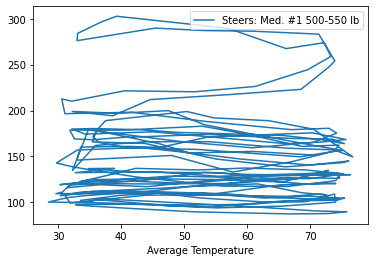

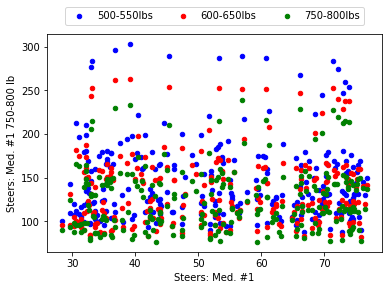

In [149]:
plt.close('all')
#yearly_max.plot()

df.plot(x='Average Temperature', y='Steers: Med. #1 500-550 lb')
ax1=df.plot.scatter(x='Average Temperature',y='Steers: Med. #1 500-550 lb',c='b',label='500-550lbs');
ax2=df.plot.scatter(x='Average Temperature',y='Steers: Med. #1 600-650 lb',c='r',ax=ax1, label='600-650lbs');
ax3=df.plot.scatter(x='Average Temperature',y='Steers: Med. #1 750-800 lb',c='g',ax=ax1, label='750-800lbs');
ax1.set_xlabel('Steers: Med. #1')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)

print(ax1 == ax2 == ax3)